In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay

sns.set(style="whitegrid")

In [2]:
df = pd.read_excel("D:/INT234/Project/Project_dataset.xlsx")
df.describe()

,Technical Score,Communication Score,Adaptability Score
count,549.000000,549.000000,549.000000
mean,5.922049,7.316174,7.391311
std,1.923263,1.681447,1.652899
min,1.000000,1.000000,2.000000
25%,4.796731,6.573537,6.790743
50%,6.067229,7.830125,7.901964
75%,7.219661,8.491673,8.592107
max,10.000000,10.000000,10.000000


In [3]:
df.head()

,Name,Age,Gender,Degree Program,CGPA,Internship,Technical Score,Communication Score,Adaptability Score,Stress,Open to relocation,Career Interest,Hackathons,Certifications,Projects,Technology Count Range
0,Arshita Thakur,19,Female,B.Tech,8.94,0,7.0,6.0,8.0,Sometimes,Yes,Data Science,More than 2,2,3,8+
1,Anshika Singh,20,Female,B.Tech,8,0,7.0,7.0,7.0,Sometimes,Yes,Data Science,1,More than 3,3,5–8
2,Manisha,19,Female,B.Tech,Not got yet,0,4.0,8.0,9.0,Sometimes,Yes,Artificial Intelligence / ML,0,2,2,1–3
3,Amit raj,22,Male,B.Tech,6.6,1,10.0,10.0,10.0,Frequently,Yes,Data Science,2,2,2,3–5
4,Sakshi,20,Female,B.Tech,Not get yet,0,5.0,10.0,7.0,Rarely,Yes,Artificial Intelligence / ML,0,1,0,1–3


In [4]:

def cgpa_clean(x):
    x = str(x).strip().lower()
    if "not" in x:
        return np.nan
    try:
        return float(x)
    except:
        return np.nan

df["CGPA"] = df["CGPA"].apply(cgpa_clean)
df["CGPA"].fillna(df["CGPA"].median(), inplace=True)


C:\Users\arshi\AppData\Local\Temp\ipykernel_31852\490951694.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CGPA"].fillna(df["CGPA"].median(), inplace=True)


In [5]:

def clean_count_column(x):
    x = str(x).lower().strip()

    if "more than 3" in x:
        return 4
    if "more than 2" in x:
        return 3

    nums = re.findall(r"\d+", x)
    return int(nums[0]) if nums else 0

for col in ["Internship", "Hackathons", "Certifications", "Projects"]:
    df[col] = df[col].apply(clean_count_column)


In [6]:
df.head()

,Name,Age,Gender,Degree Program,CGPA,Internship,Technical Score,Communication Score,Adaptability Score,Stress,Open to relocation,Career Interest,Hackathons,Certifications,Projects,Technology Count Range
0,Arshita Thakur,19,Female,B.Tech,8.94,0,7.0,6.0,8.0,Sometimes,Yes,Data Science,3,2,3,8+
1,Anshika Singh,20,Female,B.Tech,8.00,0,7.0,7.0,7.0,Sometimes,Yes,Data Science,1,4,3,5–8
2,Manisha,19,Female,B.Tech,7.60,0,4.0,8.0,9.0,Sometimes,Yes,Artificial Intelligence / ML,0,2,2,1–3
3,Amit raj,22,Male,B.Tech,6.60,1,10.0,10.0,10.0,Frequently,Yes,Data Science,2,2,2,3–5
4,Sakshi,20,Female,B.Tech,7.60,0,5.0,10.0,7.0,Rarely,Yes,Artificial Intelligence / ML,0,1,0,1–3


In [7]:

df["Technology Count Range"] = df["Technology Count Range"].astype("category")

In [8]:

df["Placement_Ready"] = (
    df["Technical Score"] +
    df["Communication Score"] +
    df["Adaptability Score"]
)

df["Placement_Ready"] = df["Placement_Ready"].apply(
    lambda x: 1 if x >= 20 else 0
)

In [9]:

#  ENCODE CATEGORICAL COLUMNS

cat_cols = [
    "Gender", "Degree Program", "Stress",
    "Open to relocation", "Career Interest",
    "Technology Count Range"
]

career_le = LabelEncoder()
df["Career Interest"] = career_le.fit_transform(df["Career Interest"].astype(str))

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [10]:

# FEATURE SELECTION

X = df.drop([
    "Name", "Placement_Ready",
    "Technical Score", "Communication Score", "Adaptability Score"
], axis=1)

y = df["Placement_Ready"]

X = X.apply(pd.to_numeric, errors="coerce")
X.fillna(0, inplace=True)


In [11]:

#  TRAIN-TEST SPLIT AND  SCALING

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:

def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name}")
    print("Accuracy :", acc)
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("Log Loss :", log_loss(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, cmap="Blues"
    )
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    return acc



Logistic Regression
Accuracy : 0.7391304347826086
Precision: 0.7280701754385965
Recall   : 0.9431818181818182
F1 Score : 0.8217821782178217
Log Loss : 9.402692188465345


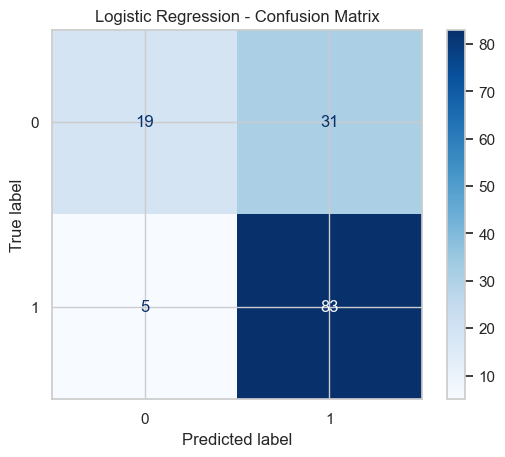


KNN
Accuracy : 0.717391304347826
Precision: 0.7168141592920354
Recall   : 0.9204545454545454
F1 Score : 0.8059701492537313
Log Loss : 10.186249870837457


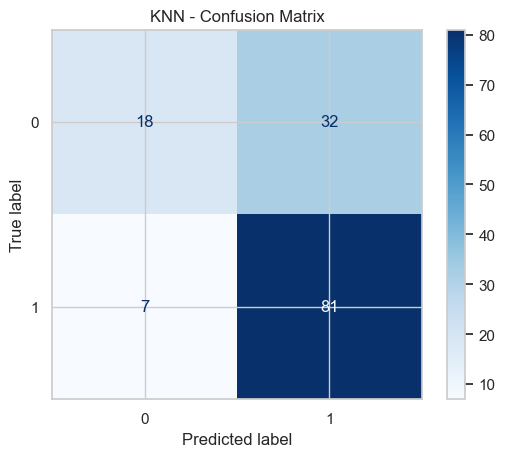


Naive Bayes
Accuracy : 0.7318840579710145
Precision: 0.7684210526315789
Recall   : 0.8295454545454546
F1 Score : 0.7978142076502732
Log Loss : 9.663878082589381


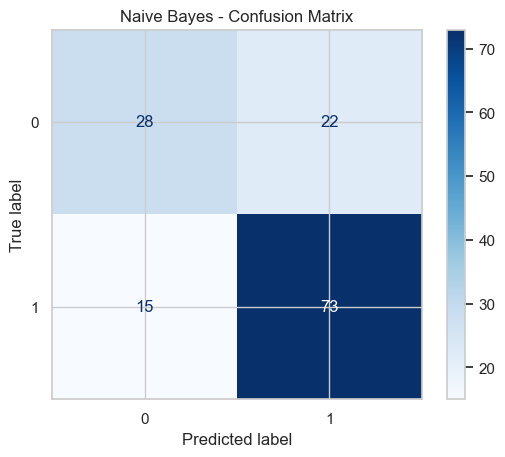


Decision Tree
Accuracy : 0.7753623188405797
Precision: 0.7878787878787878
Recall   : 0.8863636363636364
F1 Score : 0.8342245989304813
Log Loss : 8.096762717845158


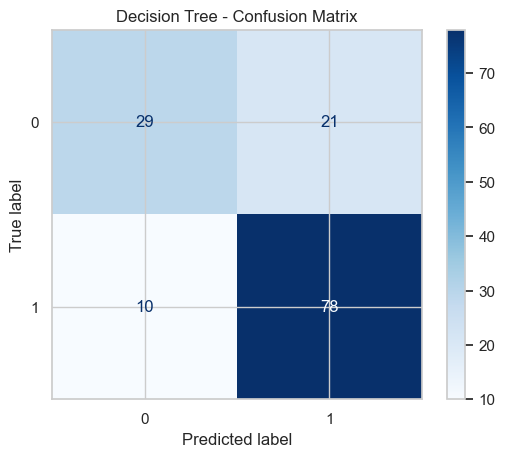


SVM
Accuracy : 0.8695652173913043
Precision: 0.85
Recall   : 0.9659090909090909
F1 Score : 0.9042553191489362
Log Loss : 4.701346094232672


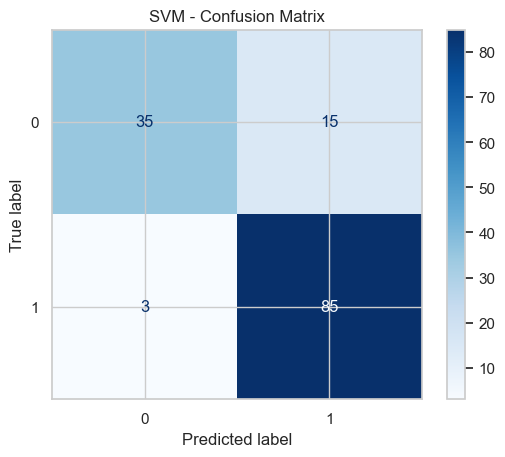

In [13]:

#  INDIVIDUAL MODEL EXECUTION

acc_results = {}

acc_results["Logistic Regression"] = evaluate_model(
    LogisticRegression(C=0.6, max_iter=600),
    "Logistic Regression"
)

acc_results["KNN"] = evaluate_model(
    KNeighborsClassifier(n_neighbors=7),
    "KNN"
)

acc_results["Naive Bayes"] = evaluate_model(
    GaussianNB(),
    "Naive Bayes"
)

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
acc_results["Decision Tree"] = evaluate_model(
    tree,
    "Decision Tree"
)

svm_model = SVC(
    C=1.5,
    kernel="rbf",
    gamma="scale",
    probability=True
)
acc_results["SVM"] = evaluate_model(
    svm_model,
    "SVM"
)


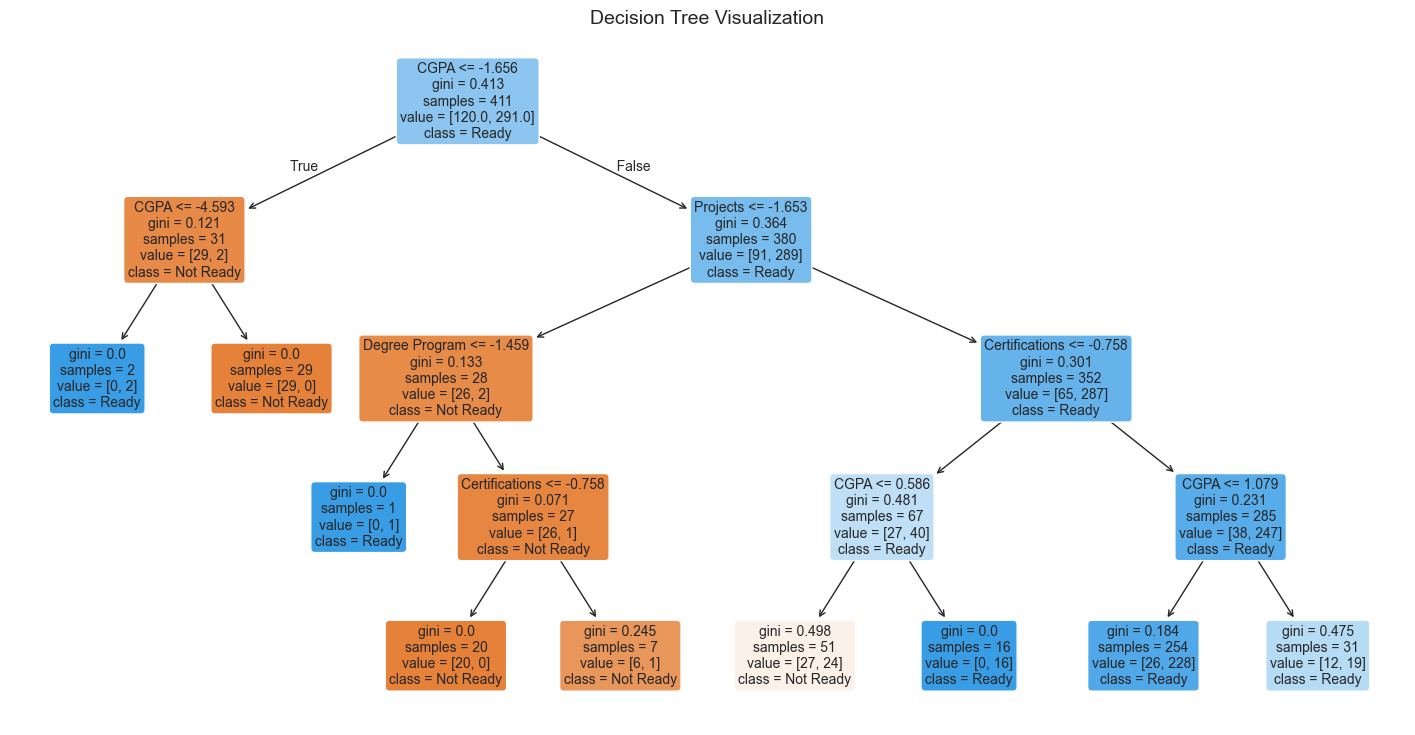

In [14]:

plt.figure(figsize=(18,9))
plot_tree(
    tree,
    filled=True,
    feature_names=X.columns,
    class_names=["Not Ready", "Ready"],
    rounded=True
)
plt.title("Decision Tree Visualization", fontsize=14)
plt.show()


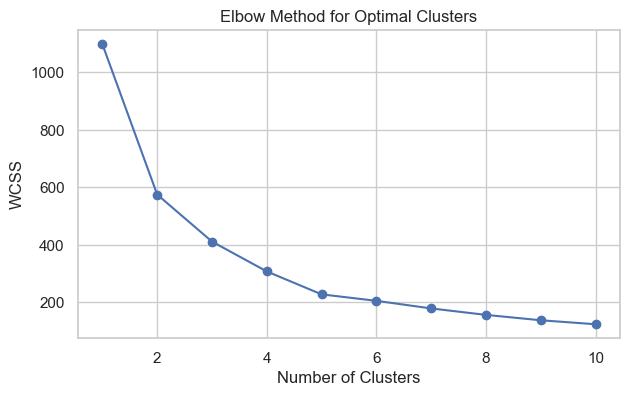

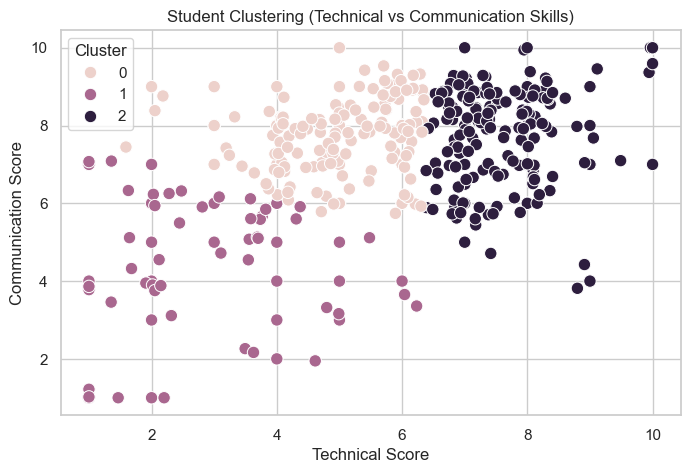

In [15]:

#  K-MEANS 
cluster_features = df[["Technical Score", "Communication Score"]]
cluster_scaled = StandardScaler().fit_transform(cluster_features)

wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(cluster_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(cluster_scaled)

plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df["Technical Score"],
    y=df["Communication Score"],
    hue=df["Cluster"],
    s=80
)
plt.title("Student Clustering (Technical vs Communication Skills)")
plt.show()


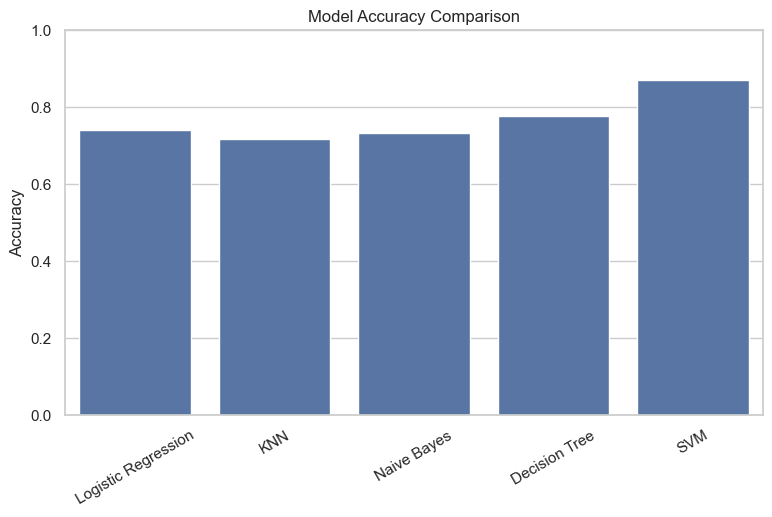

In [16]:

# FINAL MODEL COMPARISON

plt.figure(figsize=(9,5))
sns.barplot(
    x=list(acc_results.keys()),
    y=list(acc_results.values())
)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.show()


In [17]:

#  BEST MODEL

best_model = max(acc_results, key=acc_results.get)
print("\n====== BEST MODEL ======")
print("Model   :", best_model)
print("Accuracy:", acc_results[best_model])



====== BEST MODEL ======
Model   : SVM
Accuracy: 0.8695652173913043


In [18]:

# 16. FUTURE PLACEMENT READINESS PREDICTION (TOP 5 CARRER INTEREST)


svm_model.fit(X_train, y_train)


top5_encoded = df["Career Interest"].value_counts().head(5).index

# Decode course names
course_names = career_le.inverse_transform(top5_encoded)

avg_probabilities = []

for code in top5_encoded:
    course_data = df[df["Career Interest"] == code]

    X_course = course_data[X.columns]

    X_course = X_course.apply(pd.to_numeric, errors="coerce")
    X_course.fillna(0, inplace=True)

    X_course_scaled = scaler.transform(X_course)

    probs = svm_model.predict_proba(X_course_scaled)[:, 1]
    avg_probabilities.append(probs.mean())


C:\Users\arshi\AppData\Local\Temp\ipykernel_31852\2014864413.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


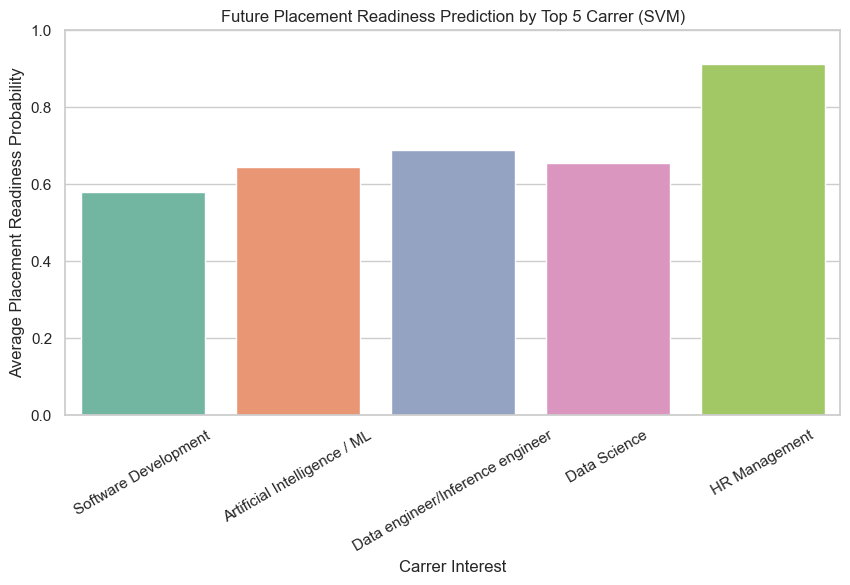

In [19]:

plt.figure(figsize=(10,5))
sns.barplot(
    x=course_names,
    y=avg_probabilities,
    palette="Set2"
)
plt.title("Future Placement Readiness Prediction by Top 5 Carrer (SVM)")
plt.xlabel("Carrer Interest")
plt.ylabel("Average Placement Readiness Probability")
plt.ylim(0,1)
plt.xticks(rotation=30)
plt.show()
